## Chapter 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 6.4 (Perfect model scenario)

In [12]:
dt = 0.01
Nout = 5
dtout = Nout * dt

d = -0.1
b = 1.
Q = 1.
R = 1.

# initial analysis mean and variance
m0 = 10.
P0 = 2.
# initial reference
y0 = 10.

STEPS = 10000000

yobs = np.zeros((STEPS))
yref = np.zeros((STEPS))
mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

y = y0

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
        
        # SDE for reference trajectory (eqn 6.14)
        y = y + dt * d * y + dt * b + np.sqrt(2. * dt * Q) * np.random.randn()
        
    yref[j] = y
    yobs[j] = y + np.sqrt(R) * np.random.randn()
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j + 1)
    timef[j] = dtout * j

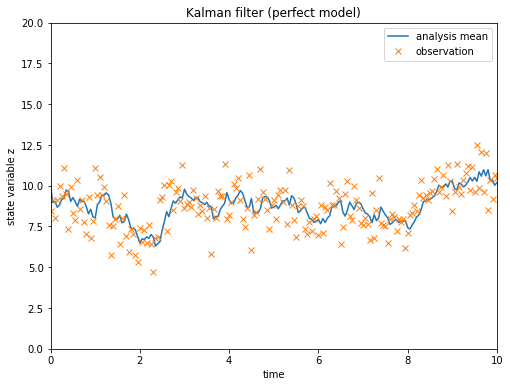

root mean square error = 0.5164
averaged continuously ranked probability score = 0.4120
ratio of y-refs above forecast mean = 0.5004
variance of analysis converges to 0.2666.


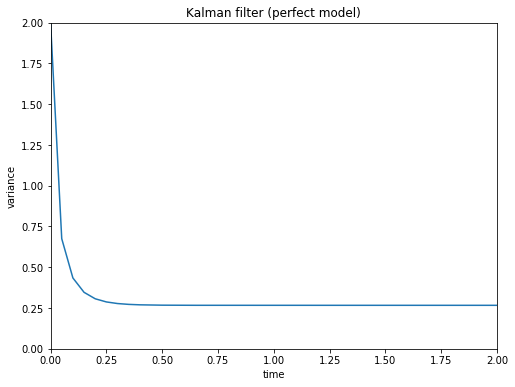

In [13]:
fig0a = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (perfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0b = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (perfect model)")
plt.show()

### Example 6.4 (Imperfect model scenario)

In [14]:
d = -0.5

mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j+1)
    timef[j] = dtout * j

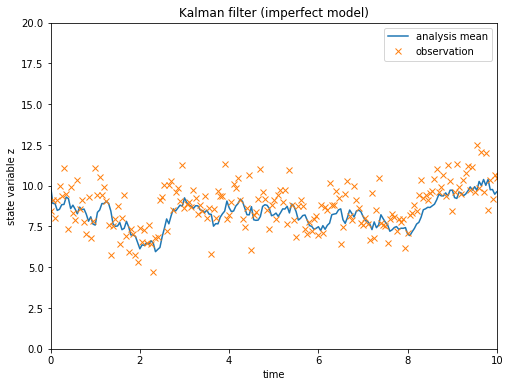

root mean square error = 0.7710
averaged continuously ranked probability score = 0.6361
ratio of y-refs above forecast mean = 0.8711
variance of analysis converges to 0.2530.


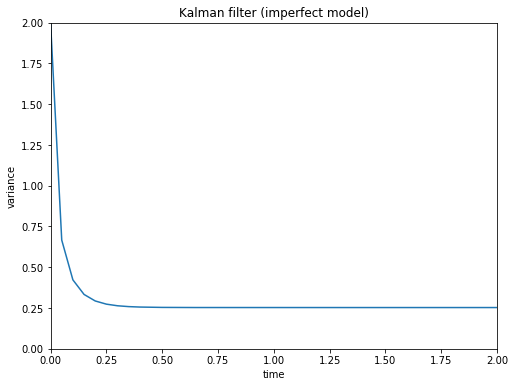

In [15]:
fig0c = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (imperfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0d = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (imperfect model)")
plt.show()

### Example 6.7 (4DVar)

In [16]:
# Taken from Chapter 1, Example 8.
# Lorenz model as a surrogate physical process

sigm = 10.
rho = 28.
beta = 8./3
dt =0.001
Nout = 50
a = 1. / np.sqrt(dt)
fakt = 1.99999
N = 2 * 10**5

# initial conditions
x = -.587
y = -.563
z = 16.870
g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)
res = np.zeros((N,7))

def gi(gi):
    if ((gi >= -a/2) and gi < 0):
        return a * (fakt * gi / a + 0.5)
    else:
        return a * (-fakt * gi / a + 0.5)
        
for i in range(N):
    res[i,:] = [i, x, y, z, g1, g2, g3]
    
    g1 = gi(g1)
    g2 = gi(g2)
    g3 = gi(g3)
    
    xn = x + dt * (sigm * (y - x)) + dt * g1
    yn = y + dt * (x * (rho - z) - y) + dt * g2
    zn = z + dt * (x * y - beta * z) + dt * g3
    
    x, y, z = xn, yn, zn
    
res[:,0] *= dt

# store only points with dt = 0.05
ressug = res[::Nout]

# add measurement error using tent map
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2.**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

# observation of x-component (dt = 0.05, first 200 datapoints)
obsx = np.zeros((N/Nout,3))
j = 0
i = 0

for k in range(0,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20
    
obsx = np.array(obsx)
obs = [obsx[:,0], obsx[:,1] + obsx[:,2]]
obs = np.array(obs)

In [23]:
# Perform 4DVar
NA = 5
CYCLES = 40
alpha = 0.025

R = 1./15

x0 = -.587
y0 = -.563
z0 = 16.870

x_anal = np.zeros((CYCLES*NA+1))
y_anal = np.zeros((CYCLES*NA+1))
z_anal = np.zeros((CYCLES*NA+1))

rmseX = np.zeros((8))
rmseY = np.zeros((8))
rmseZ = np.zeros((8))
b = np.zeros((8))

for lkl in range(8):
    if lkl == 0:
        delta = 10000.
    elif lkl == 1:
        delta = 100.
    else:
        delta = 8.*1./2**(lkl-2.)
    
    KS = 1
    x_fg = np.copy(x0)
    y_fg = np.copy(y0)
    z_fg = np.copy(z0)
    
    for lll in range(CYCLES):
        x = np.zeros((NA+1))
        y = np.zeros((NA+1))
        z = np.zeros((NA+1))
        t = np.zeros((NA+1))
        
        xb = x_fg
        yb = y_fg
        zb = z_fg
        
        x[0] = np.copy(x_fg)
        y[0] = np.copy(y_fg)
        z[0] = np.copy(z_fg)
        t[0] = 0.
        
        vareps = 1.
        ll = 1
        W = []
        
        while vareps >= 1e-2:
            JAC = np.eye(3)
            H = np.array([1, 0, 0])
            dV = np.zeros((3,NA))
            r = np.zeros((NA))
            
            for j in range(NA):
                xh = x[j]
                yh = y[j]
                zh = z[j]
                
                for i in range(Nout):
                    xo = xh
                    yo = yh
                    zo = zh
                    
                    xh = xo + dt * 10. * (yo-xo)
                    yh = yo + dt * (xo * (28. - zo) - yo)
                    zh = zo + dt * (xo * yo - 8./3 * zo)
                    
                    # Get the Jacobian of the current iteration
                    DF = np.array([[-10., 10., 0.],[28. - zo, -1., -xo],[yo, xo, -8./3]])
                    
                    # Update step for the Jacobian
                    JAC = np.dot((np.eye(3) + dt * DF) , JAC)
                    
                x[j+1] = xh
                y[j+1] = yh
                z[j+1] = zh
                
                # Calculate residual: (forward map of reference - yobs)
                r[j] = xh - obs[1,j+KS]
                #print(r)
                # Gradient of the objective functional for each observation time-step
                dV[:,j] = np.dot(JAC.T,H.T*r[j])
                #print(dV)
                t[j+1] = dt * Nout * (j+1)
                
            # Objective functional
            W.append(.5 * np.sum(r**2) + .5 * ((x[0] - xb)**2 + (y[0] - yb)**2 + (z[0] - zb)**2) / delta)
            # Gradient of the objective functional over a data assimilation cycle
            dW = np.sum(dV, axis=1) + np.hstack((x[0] - xb, y[0] - yb, z[0] - zb)) / delta
            
            # Gradient descent method - want this to converge to < 1e-2.
            vareps = np.linalg.norm(dW)
            ll += 1 # Can remove this counter - unused.

            x[0] -= alpha * dW[0]
            y[0] -= alpha * dW[1]
            z[0] -= alpha * dW[2]
            
        x_anal[KS-1:KS+NA] = x
        y_anal[KS-1:KS+NA] = y
        z_anal[KS-1:KS+NA] = z

        x_fg = x[-1]
        y_fg = y[-1]
        z_fg = z[-1]

        KS = KS+NA

    print(lkl)
    
    rmseX[lkl] = np.sqrt(np.mean((ressug[:KS,1] - x_anal[:KS])**2))
    rmseY[lkl] = np.sqrt(np.mean((ressug[:KS,2] - y_anal[:KS])**2))
    rmseZ[lkl] = np.sqrt(np.mean((ressug[:KS,3] - z_anal[:KS])**2))
    b[lkl] = delta

0
1
2
3
4
5
6
7


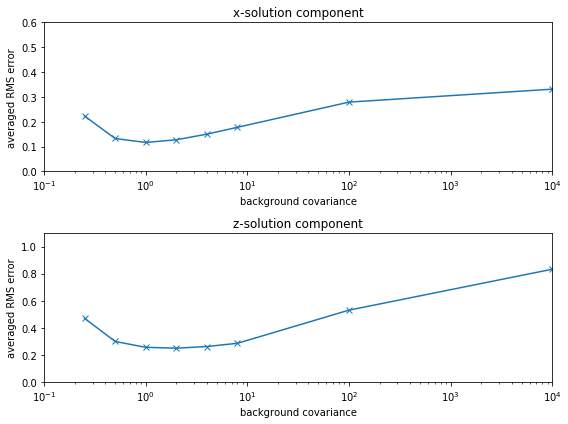

In [26]:
fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(2, 1, 1)
ax.semilogx(b,rmseX,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("x-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,0.6])

ax = fig1.add_subplot(2, 1, 2)
ax.semilogx(b,rmseZ,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("z-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,1.1])
plt.tight_layout()
plt.show()